#  Gradient descent in 1D


Gradient descent, bir makine öğrenimi konseptidir ve temel olarak bir görevdeki hata veya kaybı (error) minimize etmek için kullanılır.

Düşünün ki bir dağın tepesindesiniz ve aşağıdaki en düşük noktaya gitmek istiyorsunuz. Ancak gözlerinizle göremiyorsunuz, sadece ayak izlerinizi takip ederek aşağı iniyorsunuz. Her adım attığınızda, ayak izlerinize bakarak hangi yöne gitmeniz gerektiğini anlamaya çalışıyorsunuz.

Makine öğreniminde, bu "ayak izleri" modelin hata fonksiyonunu temsil eder. Hata fonksiyonu, modelin gerçek sonuçları ne kadar yanılttığını ölçer. Gradient descent ise bu hata fonksiyonunu azaltmak için kullanılır.

Her adımda, mevcut konumunuzdan hata fonksiyonundaki eğimin yönüne doğru bir miktar ilerlersiniz. Yani, daha iyi bir sonuç elde etmek için model parametrelerinizi güncellersiniz. Bu işlem, hata fonksiyonunu minimize etmek ve en iyi model parametrelerini bulmak için tekrarlanır.

Bu şekilde, gradient descent sayesinde model, verilerden öğrenir ve kendisini geliştirir. En sonunda, en iyi model parametrelerine ulaşarak, belirli bir görevdeki hatayı minimize eder ve daha doğru tahminler yapabilir.

Epoch (Dönem): Bir eğitim setinin tamamının model tarafından bir kez geçirilmesine bir epoch denir. Örneğin, 10 epoch eğitim süreci, modelin eğitim setini 10 kez gördüğü anlamına gelir. Epoch sayısı, modelin öğrenme sürecini etkileyebilir; yeterli epoch sayısı, modelin daha iyi performans göstermesine yardımcı olabilir, ancak çok fazla epoch, aşırı uydurmayla (overfitting) sonuçlanabilir.

Learning Rate (Öğrenme Hızı): Learning rate, bir modelin her güncelleme adımında parametrelerini ne kadar değiştireceğini belirleyen bir hiperparametredir. Büyük bir öğrenme hızı, modelin atladığı optimum noktaları, küçük bir öğrenme hızı ise yavaş bir şekilde ilerlemesini sağlar. Doğru öğrenme hızını seçmek, modelin hızlı ve etkili bir şekilde öğrenmesini sağlamak için önemlidir.

Local Minimum (Yerel Minimum): Bir optimizasyon probleminde, hata fonksiyonunun (kayıp fonksiyonu) en düşük değerine ulaştığı noktalardan biridir. "Yerel" ifadesi, bu minimumun genel en küçük değer olmadığı anlamına gelir. Modelin öğrenme sürecinde sıkça karşılaşılan bir durumdur. Model, bir yerel minimuma takılırsa, global minimumu bulamaz ve optimize edilecek daha iyi bir çözüm olabilir. Bu nedenle, bu tür durumlarla başa çıkabilmek için çeşitli optimizasyon teknikleri kullanılır.

in the context of gradient descent for optimization problems, it's standard to subtract the product of the learning rate and the gradient.

In [1]:
# import all necessary modules
import numpy as np
import matplotlib.pyplot as plt

from IPython import display
display.set_matplotlib_formats('svg')

/var/folders/j7/_0k9g61x6ld073cwcy0nc61r0000gn/T/ipykernel_2759/1582677321.py:6: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


# Gradient descent in 1D

In [2]:
# function (as a function)
def fx(x):
  return 3*x**2 - 3*x + 4

# derivative function
def deriv(x):
  return 6*x - 3

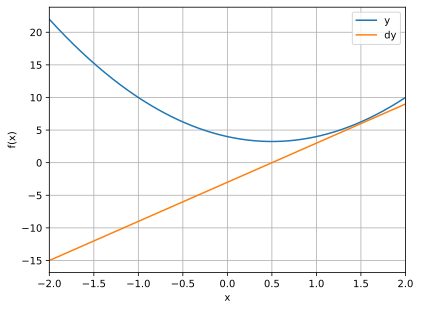

In [3]:
# plot the function and its derivative

# define a range for x
x = np.linspace(-2,2,2001)

# plotting
plt.plot(x,fx(x), x,deriv(x))
plt.xlim(x[[0,-1]])
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['y','dy'])
plt.show()

In [4]:
# random starting point
localmin = np.random.choice(x,1)
print(localmin)

# learning parameters
learning_rate = .01
training_epochs = 100

# run through training (gradient descent algorithm)
for i in range(training_epochs):
  grad = deriv(localmin)
  localmin = localmin - learning_rate*grad

localmin

[-1.92]


array([0.4950272])

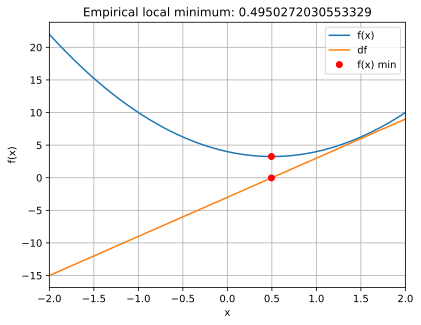

In [5]:
# plot the results

plt.plot(x,fx(x), x,deriv(x))
plt.plot(localmin,deriv(localmin),'ro')
plt.plot(localmin,fx(localmin),'ro')

plt.xlim(x[[0,-1]])
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['f(x)','df','f(x) min'])
plt.title('Empirical local minimum: %s'%localmin[0])
plt.show()

# Store the model parameters and outputs on each iteration

In [31]:
# random starting point
localmin = np.random.choice(x,1)

# learning parameters
learning_rate = 0.0001
training_epochs = 10000000

# run through training and store all the results
modelparams = np.zeros((training_epochs,2))
for i in range(training_epochs):
  grad = deriv(localmin)
  localmin = localmin - learning_rate*grad
  modelparams[i,0] = localmin
  modelparams[i,1] = grad


/var/folders/j7/_0k9g61x6ld073cwcy0nc61r0000gn/T/ipykernel_2759/3194452245.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  modelparams[i,0] = localmin
/var/folders/j7/_0k9g61x6ld073cwcy0nc61r0000gn/T/ipykernel_2759/3194452245.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  modelparams[i,1] = grad


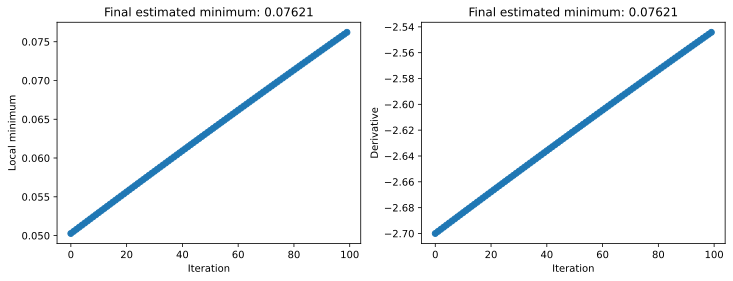

In [30]:
# plot the gradient over iterations

fig,ax = plt.subplots(1,2,figsize=(12,4))

for i in range(2):
  ax[i].plot(modelparams[:,i],'o-')
  ax[i].set_xlabel('Iteration')
  ax[i].set_title(f'Final estimated minimum: {localmin[0]:.5f}')

ax[0].set_ylabel('Local minimum')
ax[1].set_ylabel('Derivative')

plt.show()

# Additional explorations

In [ ]:
# 1) Most often in DL, the model trains for a set number of iterations, which is what we do here. But there are other ways
#    of defining how long the training lasts. Modify the code so that training ends when the derivative is smaller than 
#    some threshold, e.g., 0.1. Make sure your code is robust for negative derivatives.
# 
# 2) Does this change to the code produce a more accurate result? What if you change the stopping threshold?
# 
# 3) Can you think of any potential problems that might arise when the stopping criterion is based on the derivative 
#    instead of a specified number of training epochs?
# 

Specifically, the learning rate is a configurable hyperparameter used in the training of neural networks that has a small positive value, often in the range between 0.0 and 1.0. The learning rate controls how quickly the model is adapted to the problem.

For higher gradient value, the learning rate will be smaller and for lower gradient value, the learning rate will be larger.

An epoch is when all the training data is used at once and is defined as the total number of iterations of all the training data in one cycle for training the machine learning model. == one complete pass of the training dataset through the algorithm